In [1]:
## experiment contd. from 18-4-2020 Invoice Reading

In [1]:
## import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
from PIL import Image
import pytesseract
import cv2
from pytesseract import Output
import pandas as pd
import math
from matplotlib import pyplot as plt

In [3]:
def convolve(image, kernel):
    # PART - I :
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = (kW - 1) // 2
    # padding such that the output image will match the dimensions of the input image
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    #  Here we are simply replicating the pixels along the border of the image
    output = np.zeros((iH, iW), dtype="float32")
    
    # Other padding methods exist, including zero padding (filling the borders with zeros — very common when
    # building Convolutional Neural Networks) and wrap around (where the border pixels are determined by examining
    # the opposite end of the image). In most cases, you’ll see either replicate or zero padding.
    
    # PART - II :
    # loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to
    # bottom, 1 pixel at a time :
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
        
            # extract the ROI (Region of Interest) of the image by extracting the *center* region of the current
            # (x, y)-coordinates dimensions:
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
        
            # perform the actual convolution by taking the element-wise multiplicate between the ROI and 
            # the kernel, then summing the matrix :
            k = (roi * kernel).sum()
        
            # store the convolved value in the output (x,y)- coordinate of the output image
            output[y - pad, x - pad] = k
    
    # PART - III :
    # rescale the output image to be in the range [0, 255]:
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # return the output image:
    return output


width/columns = 2528, height/rows = 3504


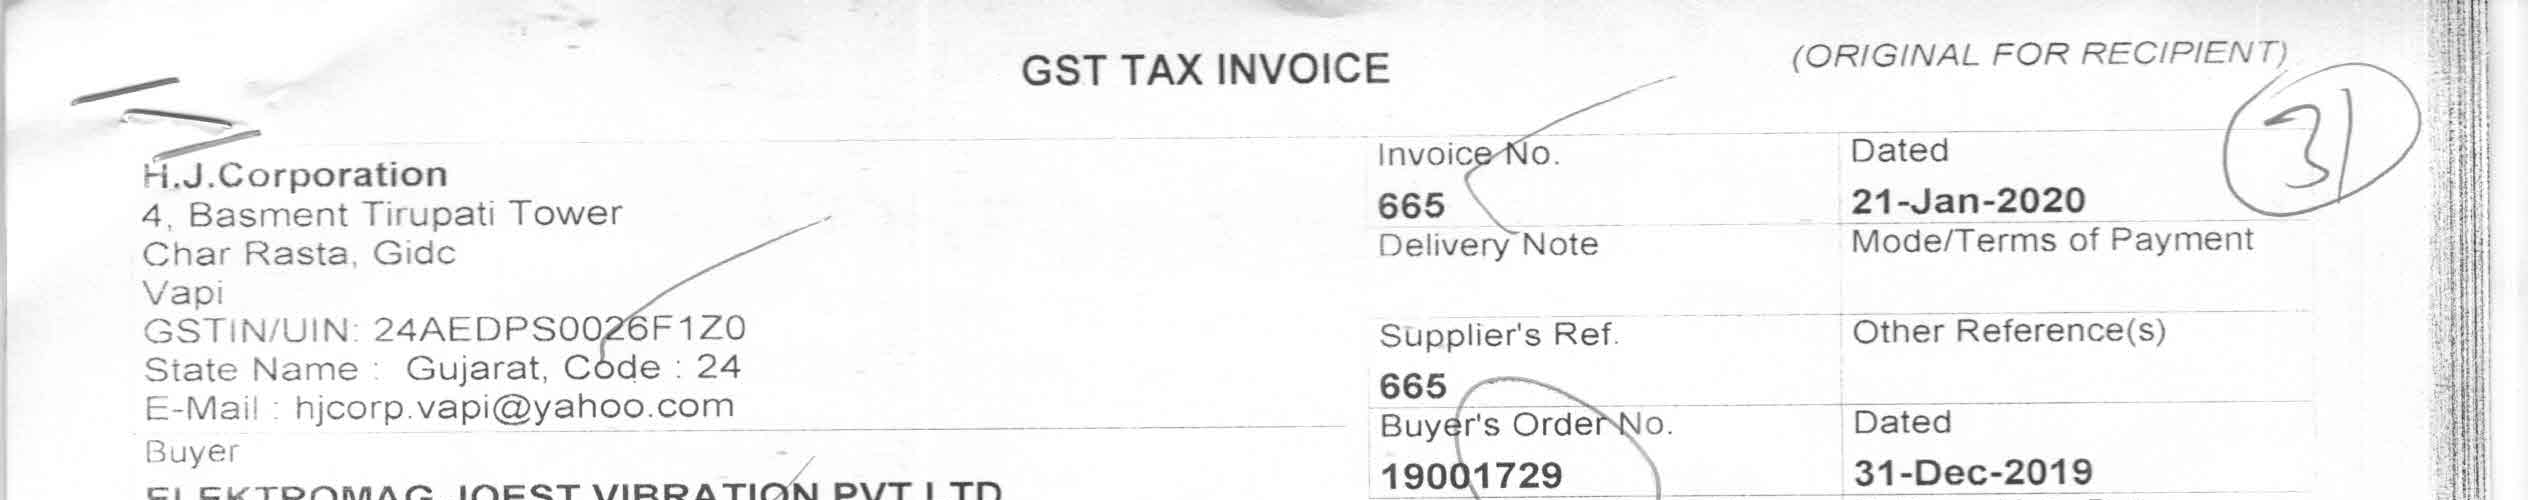

In [2]:
image_1 = cv2.imread("INVOICE1.jpg", 0) ## Loading image directly as black & white.
(H, W) = image_1.shape # H = no. of rows, W = no. of columns
print("width/columns = {}, height/rows = {}".format(W, H))
# Display in original size :
image_pil_1 = Image.fromarray(image_1[0:500, :]) 
display(image_pil_1) 

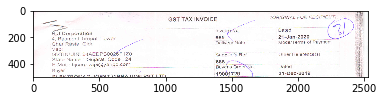

In [6]:
image_test = cv2.imread("INVOICE1.jpg")
plt.imshow(image_test[0:500, :])

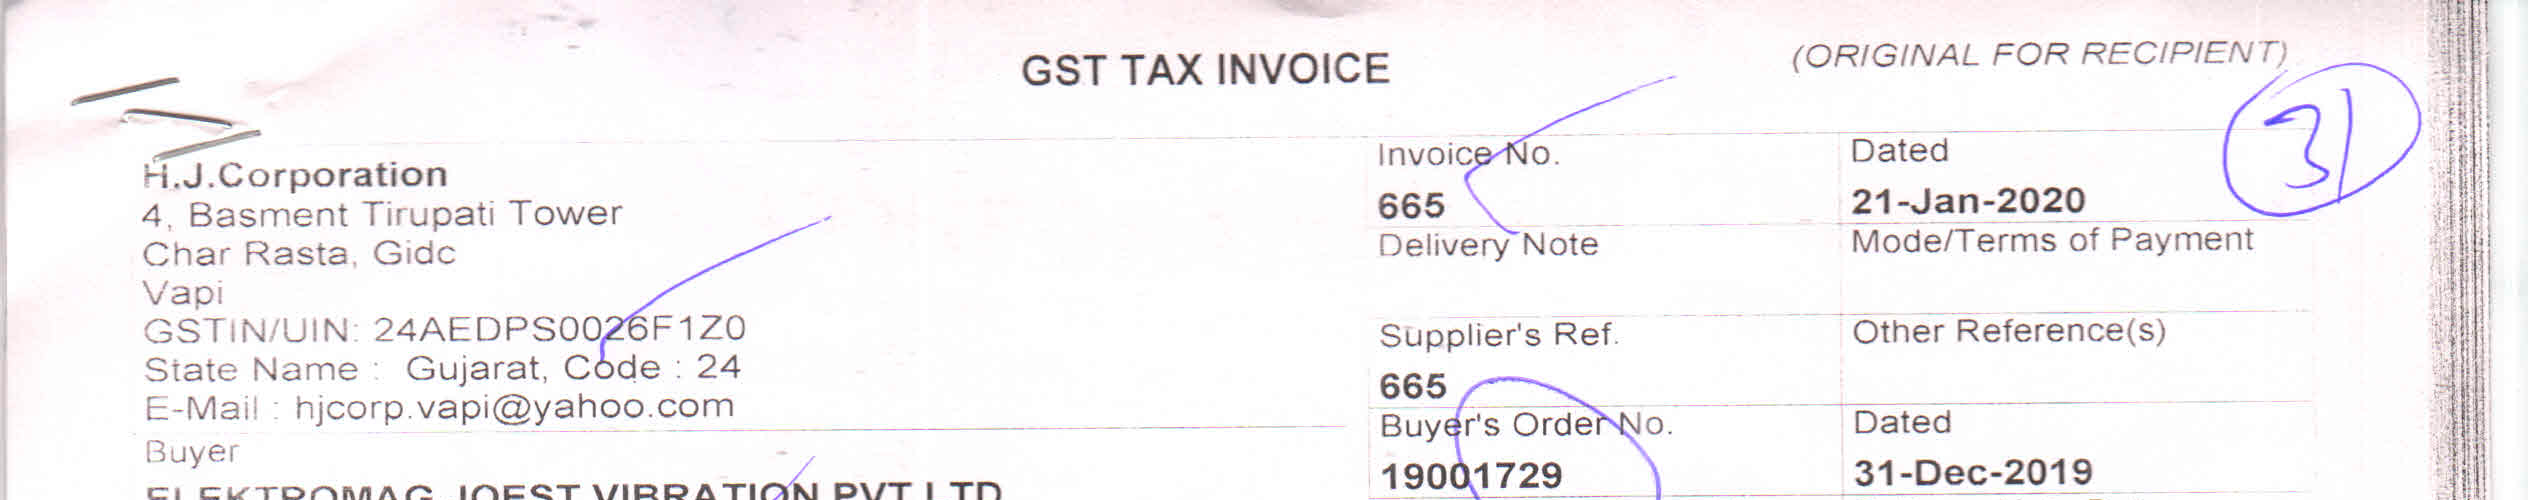

In [7]:
image_pil_test = Image.fromarray(image_test[0:500, :]) 
display(image_pil_test) 

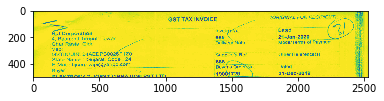

In [5]:
plt.imshow(image_1[0:500, :])

In [45]:
kernel_1 = np.array(([0, 0, 0],[0, 2, 0],[0, 0, 0]), dtype="int")
kernel_2 = np.array(([0, 0, 0],[0, 1, 0],[0, 0, 0]), dtype="int")
kernel_3 = (1/9) * kernel_2

In [46]:
convoleOutput_1 = convolve(image_1, kernel_1)
convoleOutput_2 = convolve(image_1, kernel_3)
convoleOutput_3 = convoleOutput_1 - convoleOutput_2
convoleOutput_4 = convoleOutput_1 + convoleOutput_3
convoleOutput_5 = image_1 + convoleOutput_3


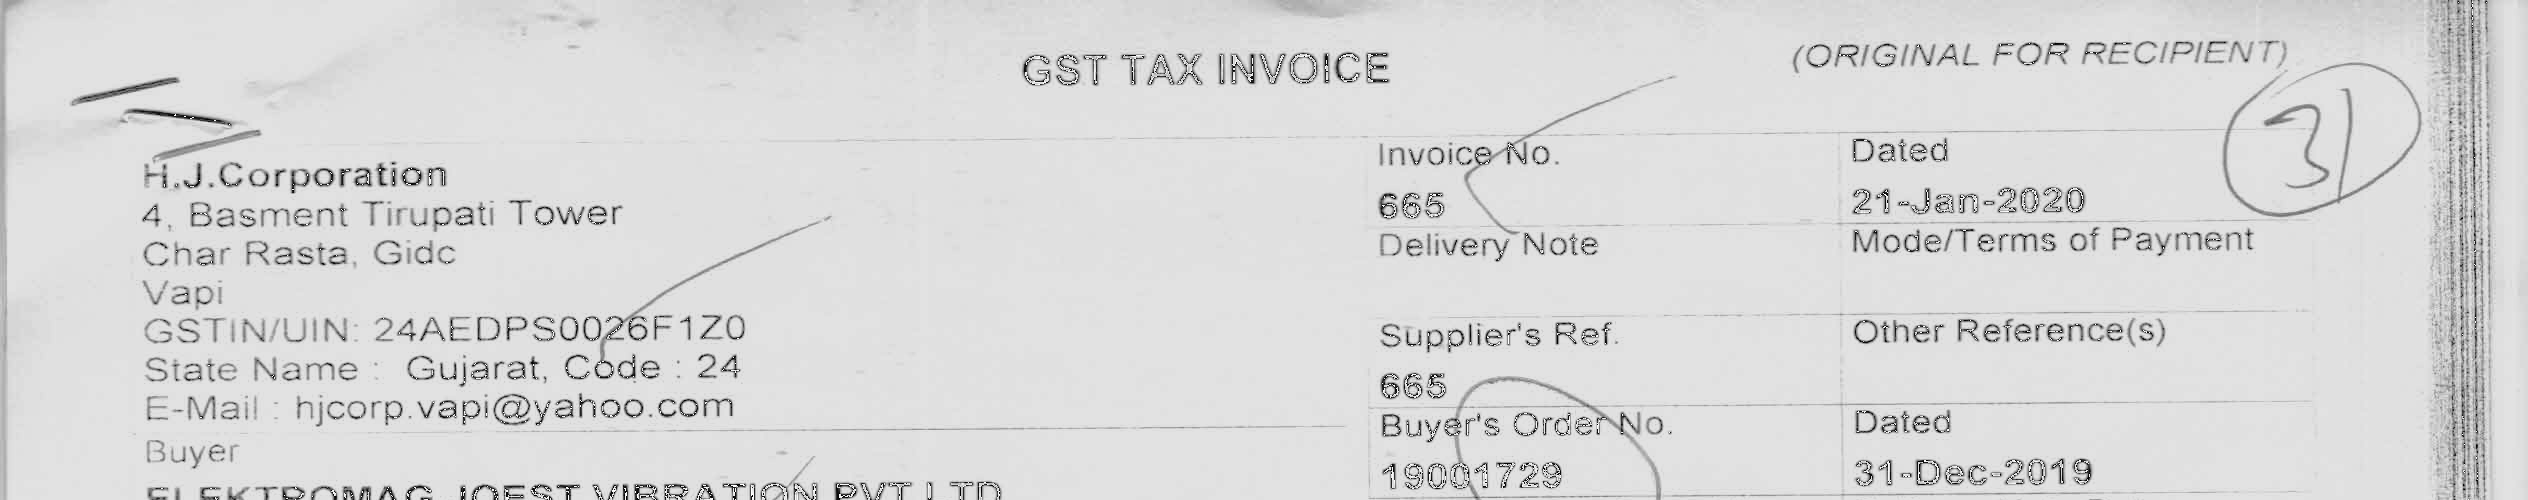

In [47]:
convoleOutput_pil = Image.fromarray(convoleOutput_5[0:500, :]) 
display(convoleOutput_pil)

In [86]:
## Converting image to text and create pandas dataframe with all text cordinates and making texts in lower case

image_1_data = pytesseract.image_to_data(image_1, output_type=Output.DICT)
image_1_pd = pd.DataFrame(image_1_data)

image_1_pd_sorted =image_1_pd.sort_values(['top', 'left']).reset_index()
image_1_pd_sorted['text'] = image_1_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_1_pd_sorted[50:100]

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
50,71,6,89,34,1958,5,1,1,4,reference(s),312,207,7
51,70,6,0,30,1839,5,1,1,4,‘other,314,105,6
52,67,6,79,25,654,5,1,1,4,f1z0,315,91,3
53,66,6,29,42,376,5,1,1,4,24aedpso0,316,225,2
54,65,6,34,44,145,5,1,1,4,"g,st'n/u]n",318,202,1
55,69,6,87,24,1555,5,1,1,4,ref.,322,63,5
56,68,6,92,29,1381,5,1,1,4,supplier‘s,323,160,4
57,72,6,-1,33,146,4,2,1,4,,354,595,0
58,77,6,91,29,565,5,2,1,4,code,354,95,5
59,79,6,96,24,698,5,2,1,4,24,354,43,7


In [8]:

#image_1_pd['text'] = image_1_pd['text'].str.replace(r'\b\d+\b','')  ## remove integers
#image_1_pd['text'] = image_1_pd['text'].str.replace(r'\W','')   ## remove puntuations
#image_1_pd['text'] = image_1_pd['text'].str.replace(r'\b\w\b','') ## remove stand alone single letters
#image_1_pd['text'] = image_1_pd['text'].str.replace(r'^[ \t\n]*$','') ## remove all blanks to single blank i.e. ''
#image_1_pd['text'].replace('', np.nan, inplace = True)
#image_1_pd.dropna(subset=['text'], inplace = True)
#image_1_pd = image_1_pd.reset_index(drop=True)

## Start finding Invoice No. :
#
## image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^inv')>0].index.tolist()


In [85]:
image_2_inv_pd= image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^ord')>0].reset_index(drop=True)
image_2_inv_pd

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,105,6,91,24,1514,5,1,1,6,orde,412,78,9


In [4]:
## Start finding Invoice No.. First get the texts having word start with 'invoice' : 

image_1_inv_pd= image_1_pd_sorted[image_1_pd_sorted['text'].str.count('^inv')>0].reset_index(drop=True)
image_1_inv_pd

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,7,1,89,33,1219,5,1,1,1,invoice,52,171,4
1,40,6,75,21,1380,5,1,1,1,invoiceno.,144,179,2
2,412,20,90,23,517,5,1,1,1,invoice,3236,113,5
3,443,22,84,24,1414,5,1,1,1,invoice,3367,97,6


In [5]:
## Invoice no. will be at top, hence discarding 'invoice' words of bottom half:

image_1_inv_pd.drop(image_1_inv_pd.loc[image_1_inv_pd['top'] > (H/2)].index, inplace=True)
image_1_inv_pd

,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,7,1,89,33,1219,5,1,1,1,invoice,52,171,4
1,40,6,75,21,1380,5,1,1,1,invoiceno.,144,179,2


In [6]:
## Preparing Invoice dataframe(s) :


pd_invoice = pd.DataFrame()

len_invoice = list()

for i in range(len(image_1_inv_pd)):
    
    row_index_1 = image_1_inv_pd['top'][i] - 20
    row_index_2 = row_index_1 + 100
    col_index_1 = image_1_inv_pd['left'][i] - 50
    col_index_2 = col_index_1 + int(W/2)
    if col_index_2 > W:
        col_index_2 = int(W)
    print(row_index_1, row_index_2, col_index_1, col_index_2)
    
    image_1_small = image_1[row_index_1:row_index_2, col_index_1:col_index_2]
    pd_invoice_data = pytesseract.image_to_data(image_1_small, output_type = Output.DICT)
    
    len_invoice.append(len(pd_invoice_data['text']))

    pd_invoice = pd_invoice.append(pd.DataFrame(pd_invoice_data))
    
print(len_invoice)

pd_invoice


32 132 1169 2433
124 224 1330 2528
[15, 18]


,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,100,0,1,0,1,0,,0,1264,0
1,1,-1,44,0,2,0,1,0,,9,1118,0
2,1,-1,44,0,3,0,1,1,,9,1118,0
3,1,-1,44,0,4,1,1,1,,9,1118,0
4,1,86,32,0,5,1,1,1,X,21,34,1
5,1,90,33,50,5,1,1,1,INVOICE,20,171,2
6,1,87,30,624,5,1,1,1,(ORIGINAL,11,186,3
7,1,90,24,824,5,1,1,1,FOR,10,76,4
8,1,86,26,913,5,1,1,1,RECIPIENT),9,205,5
9,2,-1,69,783,2,0,1,0,,31,469,0


In [8]:
## Splitting above dataframe in different 'invoice' dataframes :

l = [len_invoice[0]]
for i in range(len(len_invoice)-1):
    l.append(l[i]+len_invoice[i+1])
    
l_mod = list()    
  
l_mod = [0] + l + [max(l)+1]

pd_invoice_split = [pd_invoice.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]

In [9]:
pd_invoice_split[0]

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,100,0,1,0,1,0,,0,1264,0
1,1,-1,44,0,2,0,1,0,,9,1118,0
2,1,-1,44,0,3,0,1,1,,9,1118,0
3,1,-1,44,0,4,1,1,1,,9,1118,0
4,1,86,32,0,5,1,1,1,X,21,34,1
5,1,90,33,50,5,1,1,1,INVOICE,20,171,2
6,1,87,30,624,5,1,1,1,(ORIGINAL,11,186,3
7,1,90,24,824,5,1,1,1,FOR,10,76,4
8,1,86,26,913,5,1,1,1,RECIPIENT),9,205,5
9,2,-1,69,783,2,0,1,0,,31,469,0


In [10]:
pd_invoice_split[1]

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,100,0,1,0,1,0,,0,1198,0
1,1,-1,100,889,2,0,1,0,,0,275,0
2,1,-1,100,889,3,0,1,1,,0,275,0
3,1,-1,100,889,4,1,1,1,,0,275,0
4,1,95,100,889,5,1,1,1,,0,275,1
5,2,-1,94,48,2,0,1,0,,6,742,0
6,2,-1,94,48,3,0,1,1,,6,742,0
7,2,-1,36,50,4,1,1,1,,6,735,0
8,2,86,24,50,5,1,1,1,InvoiceNo.,18,179,1
9,2,39,1,435,5,1,1,1,—,9,6,2


In [11]:
for i in range(len(len_invoice)):
    pd_invoice_split[i]['text'] = pd_invoice_split[i]['text'].map(lambda x: x if type(x)!=str else x.lower())
    pd_invoice_split[i]['text'] = pd_invoice_split[i]['text'].str.replace(r'\b\w\b','') 
    pd_invoice_split[i]['text'] = pd_invoice_split[i]['text'].str.replace(r'^[ \t\n]*$','') 
    pd_invoice_split[i]['text'].replace('', np.nan, inplace = True)
    pd_invoice_split[i].dropna(subset=['text'], inplace = True)
    pd_invoice_split[i] = pd_invoice_split[i].reset_index(drop=True)


/home/scar3crow/Dropbox/WorkStation-Subrata/python/venv1/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/scar3crow/Dropbox/WorkStation-Subrata/python/venv1/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/scar3crow/Dropbox/WorkStation-Subrata/python/venv1/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying 

In [12]:
pd_invoice_split[0]

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,1,90,33,50,5,1,1,1,invoice,20,171,2
1,1,87,30,624,5,1,1,1,(original,11,186,3
2,1,90,24,824,5,1,1,1,for,10,76,4
3,1,86,26,913,5,1,1,1,recipient),9,205,5
4,2,0,2,783,5,1,1,1,tss,98,164,1
5,2,30,69,1058,5,1,1,1,5y,31,194,3


In [13]:
pd_invoice_split[1]

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,2,86,24,50,5,1,1,1,invoiceno.,18,179,1
1,2,39,1,435,5,1,1,1,—,9,6,2
2,2,91,31,522,5,1,1,1,dated,7,116,3
3,2,32,1,779,5,1,1,1,—,6,6,6
4,2,95,27,48,5,2,1,1,665,68,67,1
5,2,13,37,508,5,2,1,1,©21—jan—2020,63,250,2


In [44]:
##  office_pil.save('office.jpg')  for saving photo

In [19]:
dist = np.zeros((len(len_invoice),len(pd_invoice_split[1])))

for i in range(len(len_invoice)): 
    

    for j in range(len(pd_invoice_split[i])-1):
        print(j)
        a = (pd_invoice_split[i]['left'][j+1] - pd_invoice_split[i]['left'][0])**2
        print('=============', a)
        b = (pd_invoice_split[i]['top'][j+1] - pd_invoice_split[i]['top'][0])**2
        print('+++++++++++++++', b)
        dist[i, (j+1)] = math.sqrt(a+b)

dist


0
============= 329476
+++++++++++++++ 81
1
============= 599076
+++++++++++++++ 100
2
============= 744769
+++++++++++++++ 121
3
============= 537289
+++++++++++++++ 6084
4
============= 1016064
+++++++++++++++ 121
0
============= 148225
+++++++++++++++ 81
1
============= 222784
+++++++++++++++ 121
2
============= 531441
+++++++++++++++ 144
3
============= 4
+++++++++++++++ 2500
4
============= 209764
+++++++++++++++ 2025


array([[   0.        ,  574.07055316,  774.06459679,  863.07010144,
         737.13838592, 1008.06001805],
       [   0.        ,  385.10518044,  472.12816057,  729.09875874,
          50.03998401,  460.20538893]])

In [18]:
## Finding non zero values since all cells of single column will be zero, checking one value select complete column :
## This is bad way of doing, should be changed :

dist = dist[:,dist[0]!=0]
print(np.argmin(x)))

array([[ 574.07055316,  774.06459679,  863.07010144,  737.13838592,
        1008.06001805],
       [ 385.10518044,  472.12816057,  729.09875874,   50.03998401,
         460.20538893]])

In [48]:
## In the following : len(pd_invoice_split[1]) in the 1st line should be max. of 
## len(pd_invoice_split[0]) and len(pd_invoice_split[1]) and if these lengths are different we have to be careful
## to do argmin in next block since there may be zeros(0) in the array.

dist = np.zeros((len(len_invoice),(len(pd_invoice_split[1])-1)))
print(dist)


for i in range(len(len_invoice)): 
    
    iter = len(pd_invoice_split[i])
    iter_lst = [i for  i in range(1, iter)]
    print('iter_lst = ', iter_lst)
    
    for j in iter_lst:
    
        print('1st dist =',  dist[i,(j-1)])
        
        a = (pd_invoice_split[i]['left'][j] - pd_invoice_split[i]['left'][0])**2
        print('=============', a)
        b = (pd_invoice_split[i]['top'][j] - pd_invoice_split[i]['top'][0])**2
        print('+++++++++++++++', b)
        
        dist[i, (j-1)] = math.sqrt(a+b)
        print('2nd dist =',  dist[i,(j-1)])
            
dist
            

#for element in a_list[1:]:


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
iter_lst =  [1, 2, 3, 4, 5]
1st dist = 0.0
============= 329476
+++++++++++++++ 81
2nd dist = 574.070553155272
1st dist = 0.0
============= 599076
+++++++++++++++ 100
2nd dist = 774.0645967876325
1st dist = 0.0
============= 744769
+++++++++++++++ 121
2nd dist = 863.0701014402017
1st dist = 0.0
============= 537289
+++++++++++++++ 6084
2nd dist = 737.1383859222093
1st dist = 0.0
============= 1016064
+++++++++++++++ 121
2nd dist = 1008.0600180544807
iter_lst =  [1, 2, 3, 4, 5]
1st dist = 0.0
============= 148225
+++++++++++++++ 81
2nd dist = 385.1051804377604
1st dist = 0.0
============= 222784
+++++++++++++++ 121
2nd dist = 472.1281605665987
1st dist = 0.0
============= 531441
+++++++++++++++ 144
2nd dist = 729.0987587426
1st dist = 0.0
============= 4
+++++++++++++++ 2500
2nd dist = 50.039984012787215
1st dist = 0.0
============= 209764
+++++++++++++++ 2025
2nd dist = 460.2053889297691


array([[ 574.07055316,  774.06459679,  863.07010144,  737.13838592,
        1008.06001805],
       [ 385.10518044,  472.12816057,  729.09875874,   50.03998401,
         460.20538893]])

In [84]:
inter_index = np.argwhere(dist == np.min(dist))
print(type(inter_index))
print(inter_index.shape)

inv_index = [inter_index[0,0], (inter_index[0,1]+1)]

invoice_value = pd_invoice_split[inv_index[0]]['text'][inv_index[1]]

import re

p = re.compile('^[a-zA-Z]+$')  ## '^[a-zA-Z]+$' denotes only letters, no digits

if p.match(invoice_value) == None:
    print('Invoice Number = ', invoice_value)
else:
    print('Re-think')

<class 'numpy.ndarray'>
(1, 2)
Invoice Number =  665


In [62]:

print(type(inv_index))
inv_index

<class 'list'>


[1, 4]

In [54]:
dist.max()

1008.0600180544807

In [63]:
inv_index[1]

4

In [69]:
import re

re.search(r'[^\d\W]',invoice_value, flags)

In [70]:
p = re.compile('[^\d\W]')


In [71]:
print(p.match(invoice_value))

None


In [73]:
print(p.match('665'))

None


In [75]:
p = re.compile('^[a-zA-Z]+$')  ## '^[a-zA-Z]+$' denotes only letters, no digits
print(p.match(invoice_value))

None


In [77]:
p = re.compile('^[a-zA-Z]+$')

aaa = 'abcd665'
bbb = 'abcd'

print(p.match(aaa))
print(p.match(bbb))


None
<_sre.SRE_Match object; span=(0, 4), match='abcd'>


In [2]:
import re

p = re.compile('^\snv')

ccc = ' nvoice'

print(p.match(ccc))

<_sre.SRE_Match object; span=(0, 3), match=' nv'>


In [4]:
q = re.compile('^\s+vo')

ddd = '  voice'

eee = '  vo   '

print(q.match(ddd))
print(q.match(eee))


<_sre.SRE_Match object; span=(0, 4), match='  vo'>
<_sre.SRE_Match object; span=(0, 4), match='  vo'>
